# Import Needed Modules

pip install spacy

python -m spacy download en_core_web_sm

In [82]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

import spacy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
data_path = '/content/drive/My Drive/data.csv'

In [85]:
import pandas as pd
df = pd.read_csv(data_path)

# Print the shape of dataframe
print(df.shape)

# Print top 5 rows
df.head(5)

(16000, 2)


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [86]:
# Check the distribution of Emotion
df['label'].value_counts()

label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64

In [87]:
# Show sample
print(f"{df['text'][0]} -> {df['label'][0]}")

i didnt feel humiliated -> 0


# Preprocessing

In [88]:
# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

In [89]:
txt = df['text'][3]
txt

'i am ever feeling nostalgic about the fireplace i will know that it is still on the property'

In [90]:
# Tokenization
doc = nlp(txt)

### Sentence Tokenization
We won't do this process as data in dataframe is splitted in sentences

In [91]:
# for sentence in doc.sents:
#     print(sentence)

### Word Tokenization

In [92]:
for token in doc:
    print(token)

i
am
ever
feeling
nostalgic
about
the
fireplace
i
will
know
that
it
is
still
on
the
property


### Stemming and Lemmatization

In [93]:
for token in doc:
    print(f"Word: {token} | -> {token.lemma_}")

Word: i | -> I
Word: am | -> be
Word: ever | -> ever
Word: feeling | -> feel
Word: nostalgic | -> nostalgic
Word: about | -> about
Word: the | -> the
Word: fireplace | -> fireplace
Word: i | -> I
Word: will | -> will
Word: know | -> know
Word: that | -> that
Word: it | -> it
Word: is | -> be
Word: still | -> still
Word: on | -> on
Word: the | -> the
Word: property | -> property


### Stop Words

In [94]:
for token in doc:
    if token.is_stop or token.is_punct:
        print(token)

i
am
ever
about
the
i
will
that
it
is
still
on
the


### **Preprocess Function**

In [95]:
# use this utility function to get the preprocessed text data
def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [96]:
print(txt)
procces_txt = preprocess(txt)
print(procces_txt)

i am ever feeling nostalgic about the fireplace i will know that it is still on the property
feel nostalgic fireplace know property


## Apply preprocess function on dataframe

In [97]:
df['preprocessed_text'] = df['text'].apply(preprocess)

In [98]:
df

,text,label,preprocessed_text
0,i didnt feel humiliated,0,not feel humiliate
1,i can go from feeling so hopeless to so damned...,0,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,3,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,feel nostalgic fireplace know property
4,i am feeling grouchy,3,feel grouchy
...,...,...,...
15995,i just had a very brief time in the beanbag an...,0,brief time beanbag say anna feel like beat
15996,i am now turning and i feel pathetic that i am...,0,turn feel pathetic wait table sub teaching degree
15997,i feel strong and good overall,1,feel strong good overall
15998,i feel like this was such a rude comment and i...,3,feel like rude comment m glad t


## Encoding target column

In [99]:
#df['label'] = df['label'].map({'joy' : 0, 'fear': 1, 'anger': 2})

df.head(5)

,text,label,preprocessed_text
0,i didnt feel humiliated,0,not feel humiliate
1,i can go from feeling so hopeless to so damned...,0,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,3,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,feel nostalgic fireplace know property
4,i am feeling grouchy,3,feel grouchy


## Split data into train and test

In [100]:
X_train, X_test, y_train, y_test = train_test_split(df['preprocessed_text'], df['label'],
                                                    test_size=0.2, random_state=42, stratify=df['label'])

In [101]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (12800,)
Shape of X_test:  (3200,)


## Convert text column to numeric vector

In [102]:
v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

# All TfidfVectorizer vocabularies
print(v.vocabulary_)

{'feel': 3397, 'abit': 17, 'grouchy': 4023, 'kim': 5145, 'like': 5387, 'selfish': 8161, 'live': 5434, 'life': 5370, 'spend': 8684, 'time': 9390, 'school': 8077, 'yesterday': 10470, 'talk': 9159, 'folk': 3583, 'snap': 8523, 'pic': 6926, 'daughter': 2223, 'delight': 2330, 'day': 2230, 'fun': 3739, 'come': 1705, 'away': 648, 'impressed': 4578, 'happy': 4132, 'tell': 9235, 'truth': 9609, 'usual': 9947, 'feeling': 3401, 'place': 6977, 'pray': 7140, 'presence': 7185, 'god': 3917, 'realize': 7521, 'birth': 910, 'son': 8606, 'precious': 7146, 'gift': 3858, 'ride': 7812, 'broom': 1143, 'sit': 8408, 'hold': 4326, 'colin': 1677, 'wind': 10313, 'hair': 4091, 'pleasant': 7006, 'lovely': 5524, 'touch': 9471, 'need': 6224, 'express': 3264, 'badly': 686, 'ignore': 4518, 'offend': 6459, 've': 9993, 'gain': 3764, 'sense': 8181, 'everyday': 3166, 'paranoia': 6715, 'casual': 1360, 'brutality': 1158, 'fight': 3449, 'whip': 10258, 'sadden': 7964, 'hate': 4163, 'big': 895, 'girl': 3869, 'pantie': 6700, 'pret

#Visualization

**pie chart**

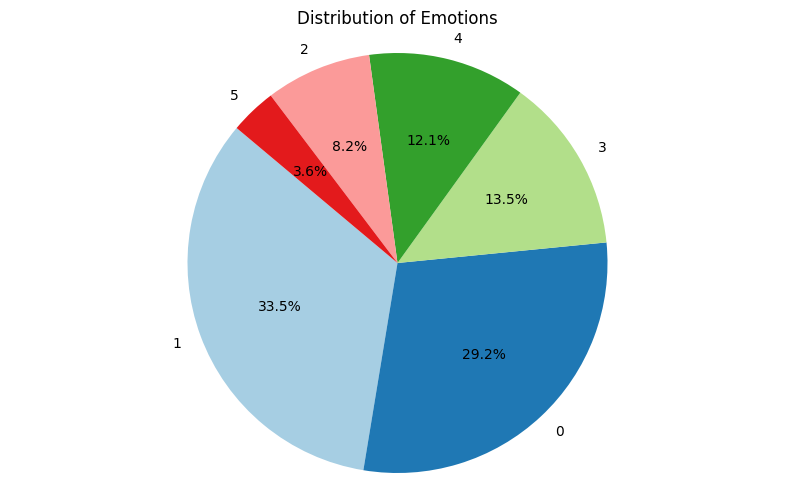

In [103]:
import matplotlib.pyplot as plt

# Check the distribution of Emotion
label_counts = df['label'].value_counts()

# Plotting the distribution of emotions using a pie chart
plt.figure(figsize=(10, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(np.arange(len(label_counts))))
plt.title('Distribution of Emotions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



**bar chart**

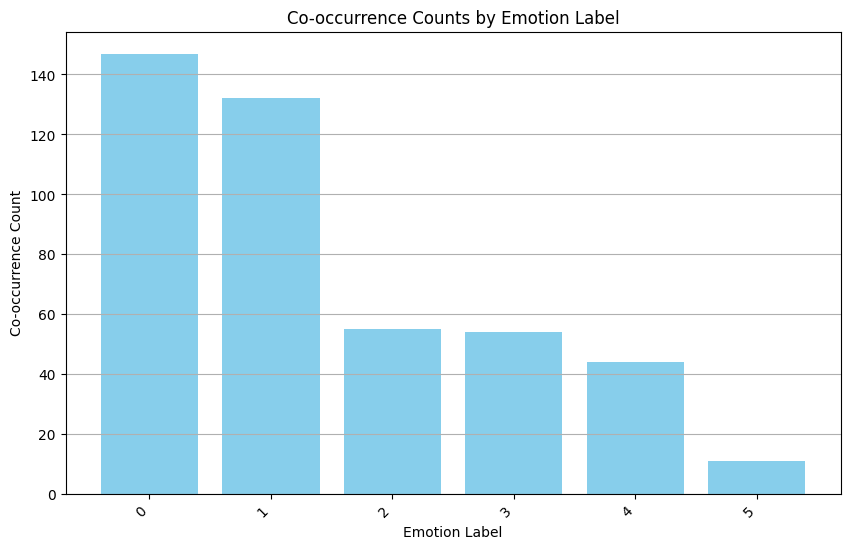

In [104]:
# Assuming df is your DataFrame and 'label' and 'preprocessed_text' are the columns in it
try:
    # Assuming you have two emotion categories (modify for more)
    emotion_labels = df['label'].unique()

    # Create a co-occurrence matrix (modify logic based on your needs)
    co_occurrence_matrix = np.zeros((len(emotion_labels), len(emotion_labels)))
    emotion_to_index = {label: idx for idx, label in enumerate(emotion_labels)}

    for i in range(len(df)):
        row_label = emotion_to_index[df['label'].iloc[i]]
        text = df['preprocessed_text'].iloc[i]
        text_tokens = text.split()

        # Calculate co-occurrence within a window of size 2 (modify as needed)
        for j in range(len(text_tokens) - 1):
            col_label = row_label  # Since the label is the same for the same text
            if text_tokens[j] == text_tokens[j + 1]:  # Check for consecutive words
                co_occurrence_matrix[row_label][col_label] += 1

    # Aggregate co-occurrence counts per emotion label
    co_occurrence_counts = co_occurrence_matrix.sum(axis=1)

    # Create a DataFrame for plotting
    co_occurrence_df = pd.DataFrame({
        'Emotion': emotion_labels,
        'Co-occurrence Count': co_occurrence_counts
    })

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(co_occurrence_df['Emotion'], co_occurrence_df['Co-occurrence Count'], color="skyblue")

    plt.xlabel('Emotion Label')
    plt.ylabel('Co-occurrence Count')
    plt.title('Co-occurrence Counts by Emotion Label')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

**Heatmap**

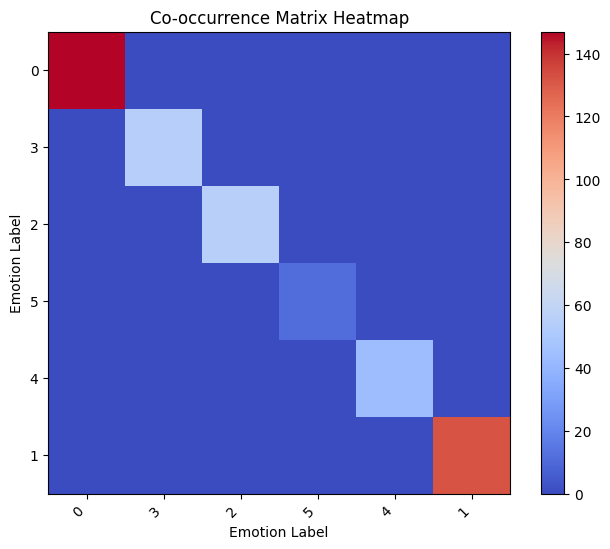

In [105]:

# Assuming df is your DataFrame and 'label' and 'preprocessed_text' are the columns in it
try:
    # Assuming you have two emotion categories (modify for more)
    emotion_labels = df['label'].unique()

    # Create a co-occurrence matrix (modify logic based on your needs)
    co_occurrence_matrix = np.zeros((len(emotion_labels), len(emotion_labels)))
    emotion_to_index = {label: idx for idx, label in enumerate(emotion_labels)}

    for i in range(len(df)):
        row_label = emotion_to_index[df['label'].iloc[i]]
        text = df['preprocessed_text'].iloc[i]
        text_tokens = text.split()

        # Calculate co-occurrence within a window of size 2 (modify as needed)
        for j in range(len(text_tokens) - 1):
            col_label = row_label  # Since the label is the same for the same text
            if text_tokens[j] == text_tokens[j + 1]:  # Check for consecutive words
                co_occurrence_matrix[row_label][col_label] += 1

    # Heatmap plotting
    plt.figure(figsize=(8, 6))
    plt.imshow(co_occurrence_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(np.arange(len(emotion_labels)), emotion_labels, rotation=45, ha='right')
    plt.yticks(np.arange(len(emotion_labels)), emotion_labels)
    plt.xlabel('Emotion Label')
    plt.ylabel('Emotion Label')
    plt.title('Co-occurrence Matrix Heatmap')
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

**Area Charts**

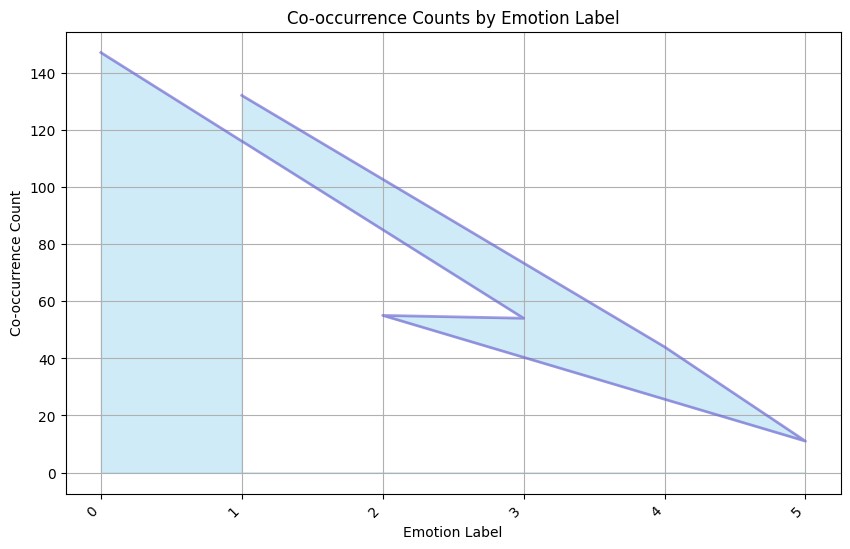

In [106]:
# Assuming df is your DataFrame and 'label' and 'preprocessed_text' are the columns in it
try:
    # Assuming you have two emotion categories (modify for more)
    emotion_labels = df['label'].unique()

    # Create a co-occurrence matrix (modify logic based on your needs)
    co_occurrence_matrix = np.zeros((len(emotion_labels), len(emotion_labels)))
    emotion_to_index = {label: idx for idx, label in enumerate(emotion_labels)}

    for i in range(len(df)):
        row_label = emotion_to_index[df['label'].iloc[i]]
        text = df['preprocessed_text'].iloc[i]
        text_tokens = text.split()

        # Calculate co-occurrence within a window of size 2 (modify as needed)
        for j in range(len(text_tokens) - 1):
            col_label = row_label  # Since the label is the same for the same text
            if text_tokens[j] == text_tokens[j + 1]:  # Check for consecutive words
                co_occurrence_matrix[row_label][col_label] += 1

    # Aggregate co-occurrence counts per emotion label
    co_occurrence_counts = co_occurrence_matrix.sum(axis=1)

    # Create a DataFrame for plotting
    co_occurrence_df = pd.DataFrame({
        'Emotion': emotion_labels,
        'Co-occurrence Count': co_occurrence_counts
    })

    # Plotting the area chart
    plt.figure(figsize=(10, 6))
    plt.fill_between(co_occurrence_df['Emotion'], co_occurrence_df['Co-occurrence Count'], color="skyblue", alpha=0.4)
    plt.plot(co_occurrence_df['Emotion'], co_occurrence_df['Co-occurrence Count'], color="Slateblue", alpha=0.6, linewidth=2)

    plt.xlabel('Emotion Label')
    plt.ylabel('Co-occurrence Count')
    plt.title('Co-occurrence Counts by Emotion Label')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

**line chart**

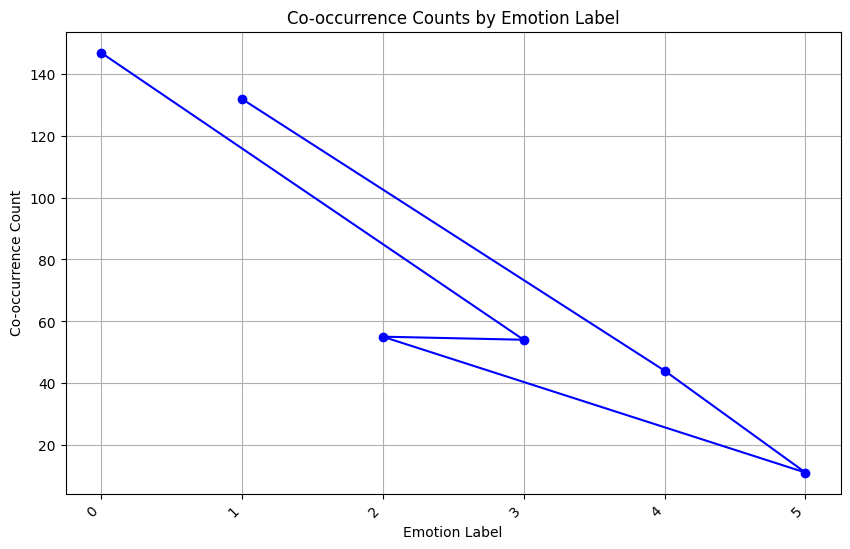

In [107]:
# Assuming df is your DataFrame and 'label' and 'preprocessed_text' are the columns in it
try:
    # Assuming you have two emotion categories (modify for more)
    emotion_labels = df['label'].unique()

    # Create a co-occurrence matrix (modify logic based on your needs)
    co_occurrence_matrix = np.zeros((len(emotion_labels), len(emotion_labels)))
    emotion_to_index = {label: idx for idx, label in enumerate(emotion_labels)}

    for i in range(len(df)):
        row_label = emotion_to_index[df['label'].iloc[i]]
        text = df['preprocessed_text'].iloc[i]
        text_tokens = text.split()

        # Calculate co-occurrence within a window of size 2 (modify as needed)
        for j in range(len(text_tokens) - 1):
            col_label = row_label  # Since the label is the same for the same text
            if text_tokens[j] == text_tokens[j + 1]:  # Check for consecutive words
                co_occurrence_matrix[row_label][col_label] += 1

    # Aggregate co-occurrence counts per emotion label
    co_occurrence_counts = co_occurrence_matrix.sum(axis=1)

    # Create a DataFrame for plotting
    co_occurrence_df = pd.DataFrame({
        'Emotion': emotion_labels,
        'Co-occurrence Count': co_occurrence_counts
    })

    # Plotting the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(co_occurrence_df['Emotion'], co_occurrence_df['Co-occurrence Count'], marker='o', linestyle='-', color='b')

    plt.xlabel('Emotion Label')
    plt.ylabel('Co-occurrence Count')
    plt.title('Co-occurrence Counts by Emotion Label')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True)
    plt.show()

except Exception as e:
    print(f"An error occurred: {e}")

# Machine Learning Model

## 1. Naive Bayes

In [109]:
NB_model = MultinomialNB()

# Model training
NB_model.fit(X_train_cv, y_train)

MultinomialNB()

In [110]:
# Get prediction
y_pred_nb = NB_model.predict(X_test_cv)

In [111]:
# Print accuracy score
print(accuracy_score(y_test, y_pred_nb))

0.69


In [112]:
# Print classification report
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.70      0.92      0.80       933
           1       0.63      0.97      0.76      1072
           2       1.00      0.08      0.16       261
           3       0.96      0.39      0.56       432
           4       0.93      0.29      0.44       387
           5       1.00      0.01      0.02       115

    accuracy                           0.69      3200
   macro avg       0.87      0.45      0.46      3200
weighted avg       0.77      0.69      0.63      3200



### Model Performance

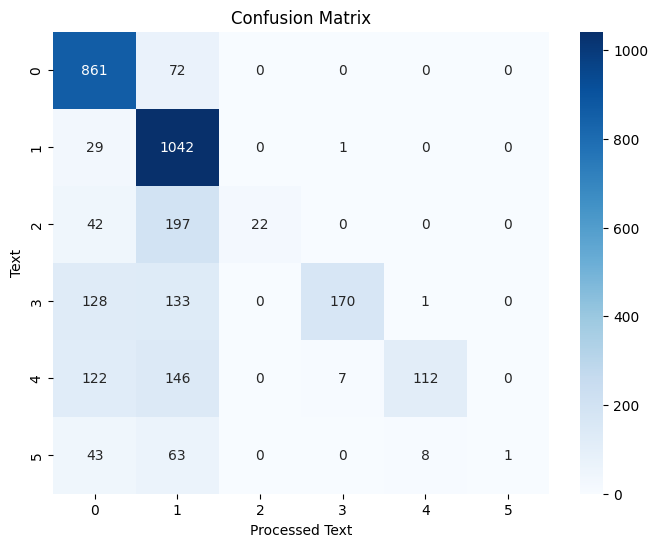

In [113]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=NB_model.classes_, yticklabels=NB_model.classes_)
plt.xlabel('Processed Text')
plt.ylabel('Text')
plt.title('Confusion Matrix')
plt.show()

## 2. Random Forest

In [114]:
RFC_model = RandomForestClassifier()

RFC_model.fit(X_train_cv, y_train)

RandomForestClassifier()

In [115]:
# Get the predictions for X_test and store it in y_pred
y_pred_rfc = RFC_model.predict(X_test_cv)

In [116]:
# Print Accuracy
print(accuracy_score(y_test, y_pred_rfc))

0.8596875


In [117]:
# Print the classfication report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       933
           1       0.83      0.91      0.87      1072
           2       0.82      0.62      0.71       261
           3       0.89      0.85      0.87       432
           4       0.83      0.86      0.85       387
           5       0.80      0.68      0.74       115

    accuracy                           0.86      3200
   macro avg       0.85      0.80      0.82      3200
weighted avg       0.86      0.86      0.86      3200



### Model Performance

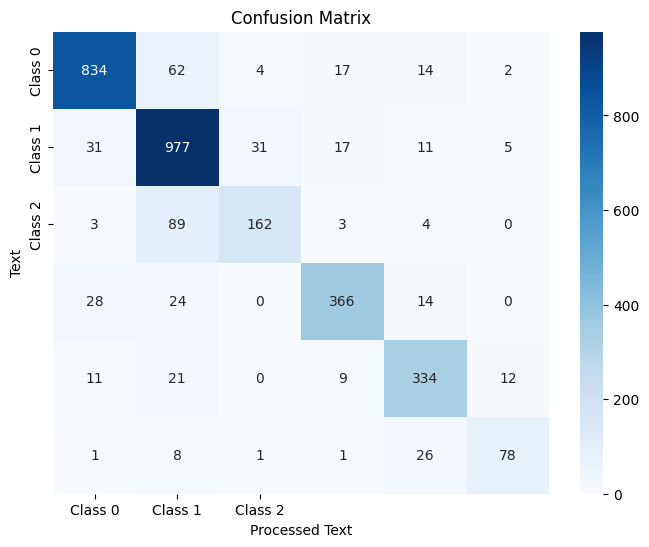

In [118]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfc)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Processed Text')
plt.ylabel('Text')
plt.title('Confusion Matrix')
plt.show()

# Test Model

## Get text

In [119]:
test_text = df['text'][2000]
test_text

'i provided dinner alcohol and a place to crash and all i got in return was the feeling of being completely unwelcome in my own apartment'

## Apply preprocess

In [120]:
test_text_processed = [preprocess(test_text)]
test_text_processed

['provide dinner alcohol place crash get return feeling completely unwelcome apartment']

## Convert to vector

In [121]:
test_text_vc = v.transform(test_text_processed)

## Get Prediction

In [122]:
test_text = RFC_model.predict(test_text_vc)

## Output

In [123]:
print(f"{df['label'][2000]} -> {df['label'][2000]}")
print(test_text)

0 -> 0
[0]
